In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import glob
import pickle
import pandas as pd

In [5]:
import sys
sys.path.append('../..')
from utils import apply_df_filters
#from decoders import cv_decode_shenoy
from loaders import load_shenoy

In [20]:
# Identify which preprocessing combinations give good decoding results
# Fit without dimreduc to get baselines...

In [6]:
# Load the decoding results
decoding_results = glob.glob('/mnt/Secondary/data/shenoy_decoding/shenoy_decoding_*.dat')

In [7]:
len(decoding_results)

195

In [8]:
# Convert to pandas dataframe
d = []
for file in decoding_results:
    with open(file, 'rb') as f:
        d_ = pickle.load(f)
    d.extend(d_)

In [9]:
dec_df = pd.DataFrame(d)

In [10]:
dim_vals = np.unique(dec_df['dim'].values)
fold_idxs = np.unique(dec_df['fold_idx'].values)
filter_sigma = np.unique(dec_df['filter_sigma'].values)
bin_width = np.unique(dec_df['bin_width'].values)
trainlags = np.unique(dec_df['trainlag'].values)
testlags = np.unique(dec_df['testlag'].values)
dws = np.unique(dec_df['decoding_window'].values)
data_files = np.unique(dec_df['data_file'].values)

In [27]:
trainlag = 0
testlag = 0

dca_r2 = np.zeros((data_files.size, dim_vals.size, fold_idxs.size, 3))
pca_r2 = np.zeros((data_files.size, dim_vals.size, fold_idxs.size, 3))
ols_r2 = np.zeros((data_files.size, dim_vals.size, fold_idxs.size, 3))
dca_r22 = np.zeros((data_files.size, dim_vals.size, fold_idxs.size, 3))

for i, data_file in enumerate(data_files):

    df = apply_df_filters(dec_df, data_file=data_file, trainlag=trainlag, testlag=testlag) 
    if len(df) == 0:
        continue
    
    
    for j, dim in enumerate(dim_vals):
        for k, fold_idx in enumerate(fold_idxs):
            df_ = apply_df_filters(df, dim=dim, fold_idx=fold_idx, trainlag=trainlag, testlag=testlag)
#             df_2 = apply_df_filters(dec_df, dim=dim, fold_idx=fold_idx, 
#                                     data_file=data_file, trainlag=1, testlag=1)
            try:
                dca_r2[i, j, k, :] = apply_df_filters(df_, dr_method='DCA').iloc[0]['r2'][:]
    #             dca_r22[j, k, :] = apply_df_filters(df_2, dr_method='DCA').iloc[0]['r2'][:]
                pca_r2[i, j, k, :] = apply_df_filters(df_, dr_method='PCA').iloc[0]['r2'][:]
                ols_r2[i, j, k, :] = apply_df_filters(df_, dr_method='OLS').iloc[0]['r2'][:]
            except:
                dca_r2[i, j, k, :] = np.nan
                pca_r2[i, j, k, :] = np.nan
                ols_r2[i, j, k, :] = np.nan

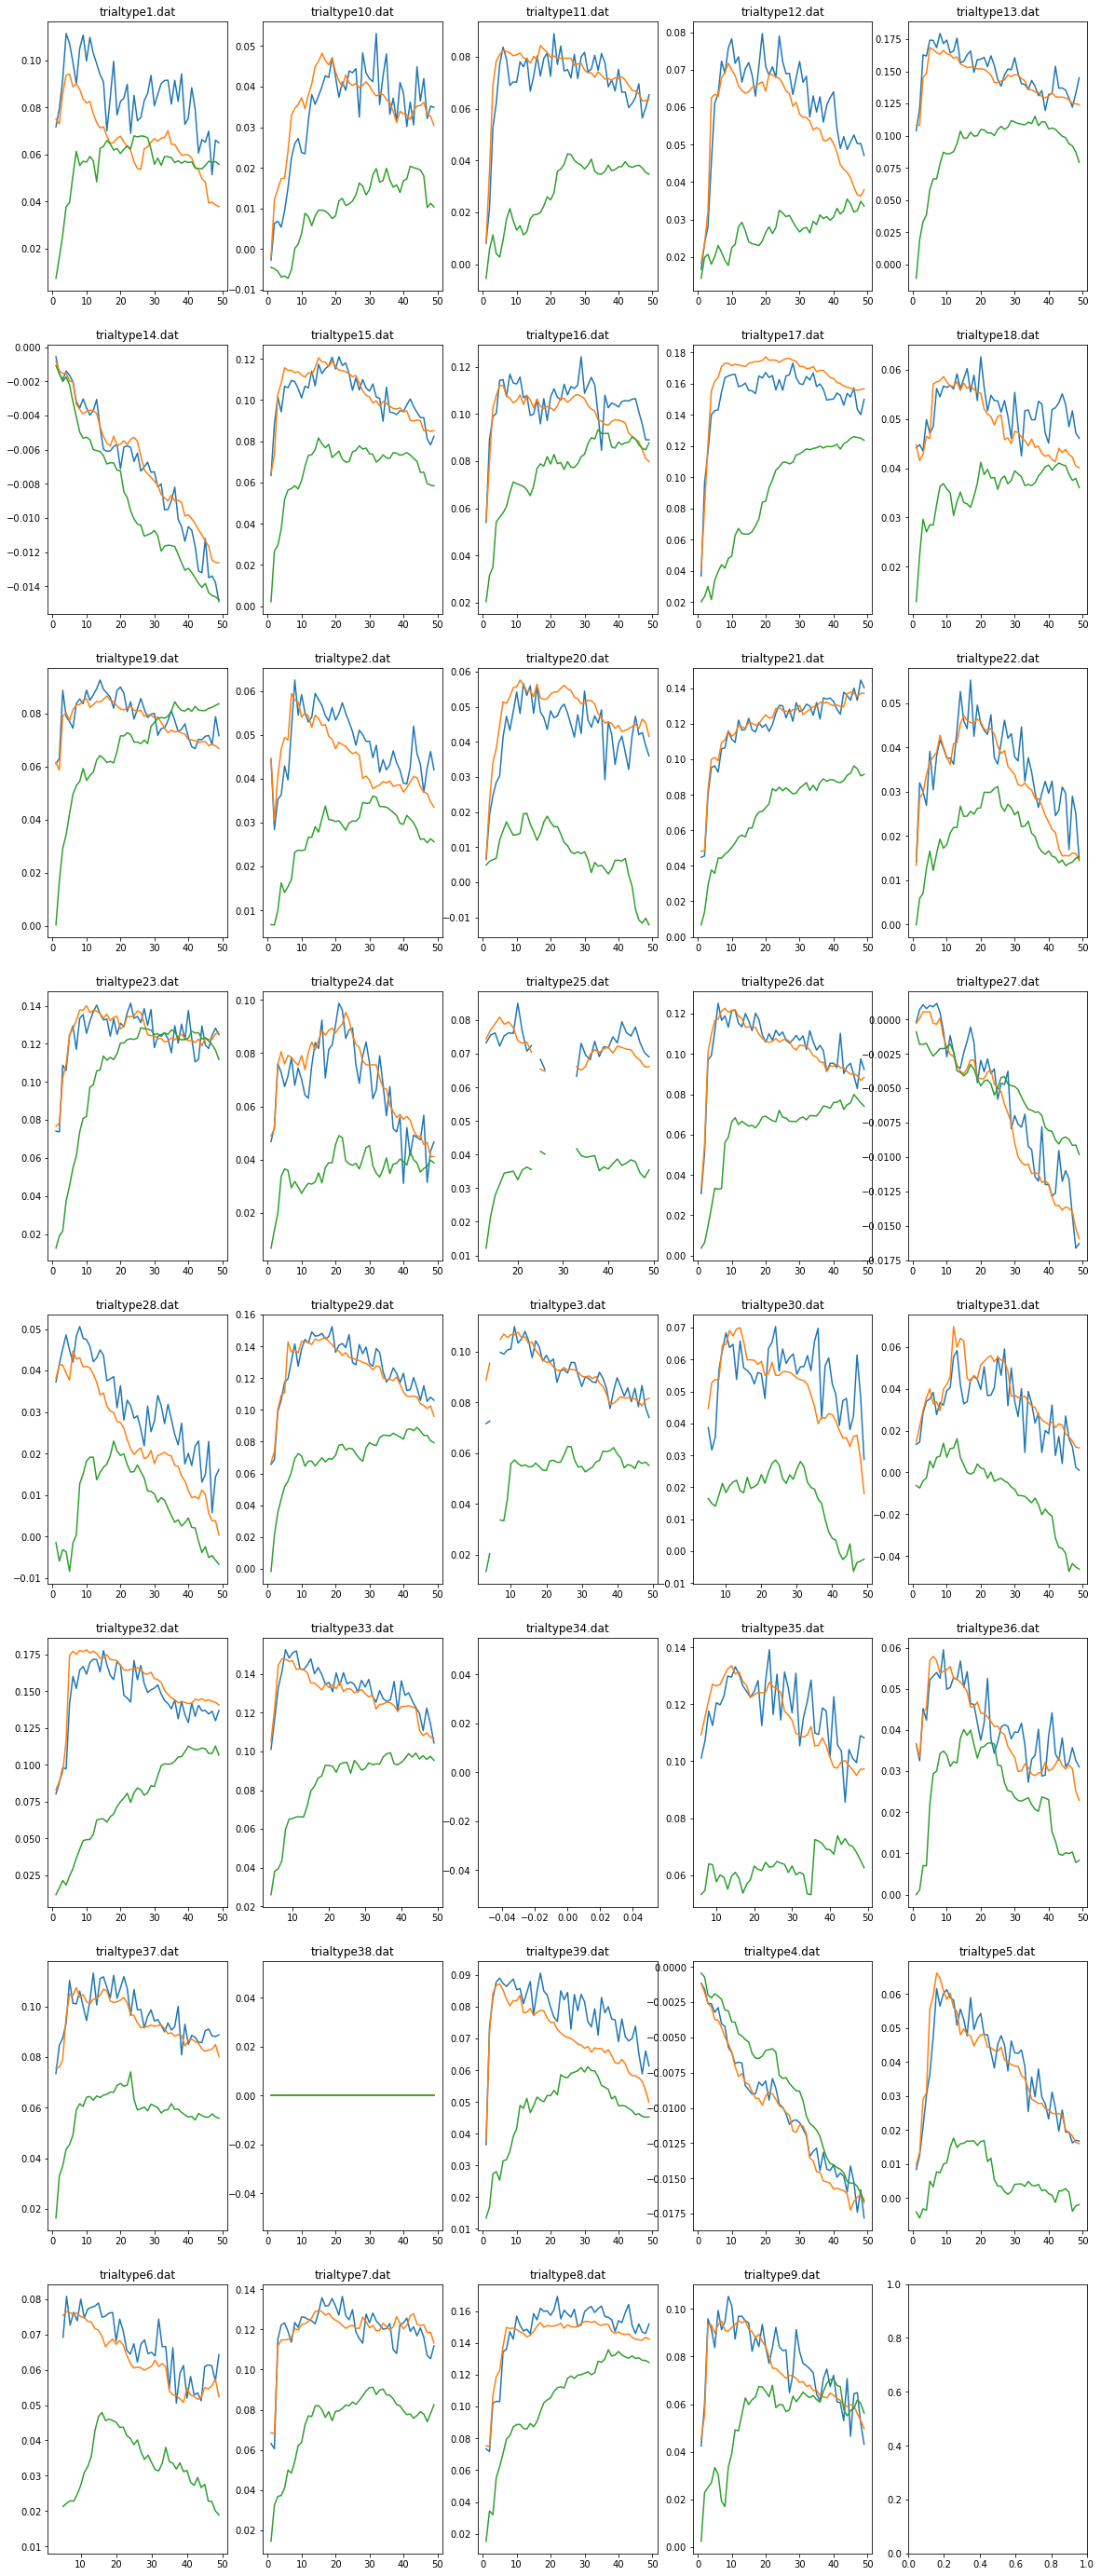

In [29]:
fig, ax = plt.subplots(8, 5, figsize=(20, 50))
for i, data_file in enumerate(np.unique(dec_df['data_file'].values)):
    a = ax[np.unravel_index(i, (8, 5))]
    a.plot(dim_vals, np.mean(dca_r2[i, ..., 1], axis = 1))
    a.plot(dim_vals, np.mean(pca_r2[i, ..., 1], axis = 1))
    a.plot(dim_vals, np.mean(ols_r2[i, ..., 1], axis = 1))
    a.set_title(data_file)

In [ ]:
# Loading correlation? Need KCA results, and see if there aren't parameter values that will magnify the gap between
# KCA and PCA

In [ ]:
fig, ax = plt.subplots(8, 4, figsize=(20, 50))
trainlag = 1
testlag = 1
for i, data_file in enumerate(np.unique(dec_df['data_file'].values)):
    a = ax[np.unravel_index(i, (8, 4))]

    df = apply_df_filters(dec_df, data_file=data_file, trainlag=trainlag, testlag=testlag) 
    if len(df) == 0:
        continue
    
    dca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    pca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    ols_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    
    for j, dim in enumerate(dim_vals):
        for k, fold_idx in enumerate(fold_idxs):
            df_ = apply_df_filters(df, dim=dim, fold_idx=fold_idx, trainlag=trainlag, testlag=testlag)

            dca_r2[j, k, :] = apply_df_filters(df_, dr_method='DCA').iloc[0]['r2'][:]
            pca_r2[j, k, :] = apply_df_filters(df_, dr_method='PCA').iloc[0]['r2'][:]
            ols_r2[j, k, :] = apply_df_filters(df_, dr_method='OLS').iloc[0]['r2'][:]
        
    a.plot(dim_vals, np.mean(dca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(pca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(ols_r2[..., 0], axis = 1))
    a.set_title(data_file)

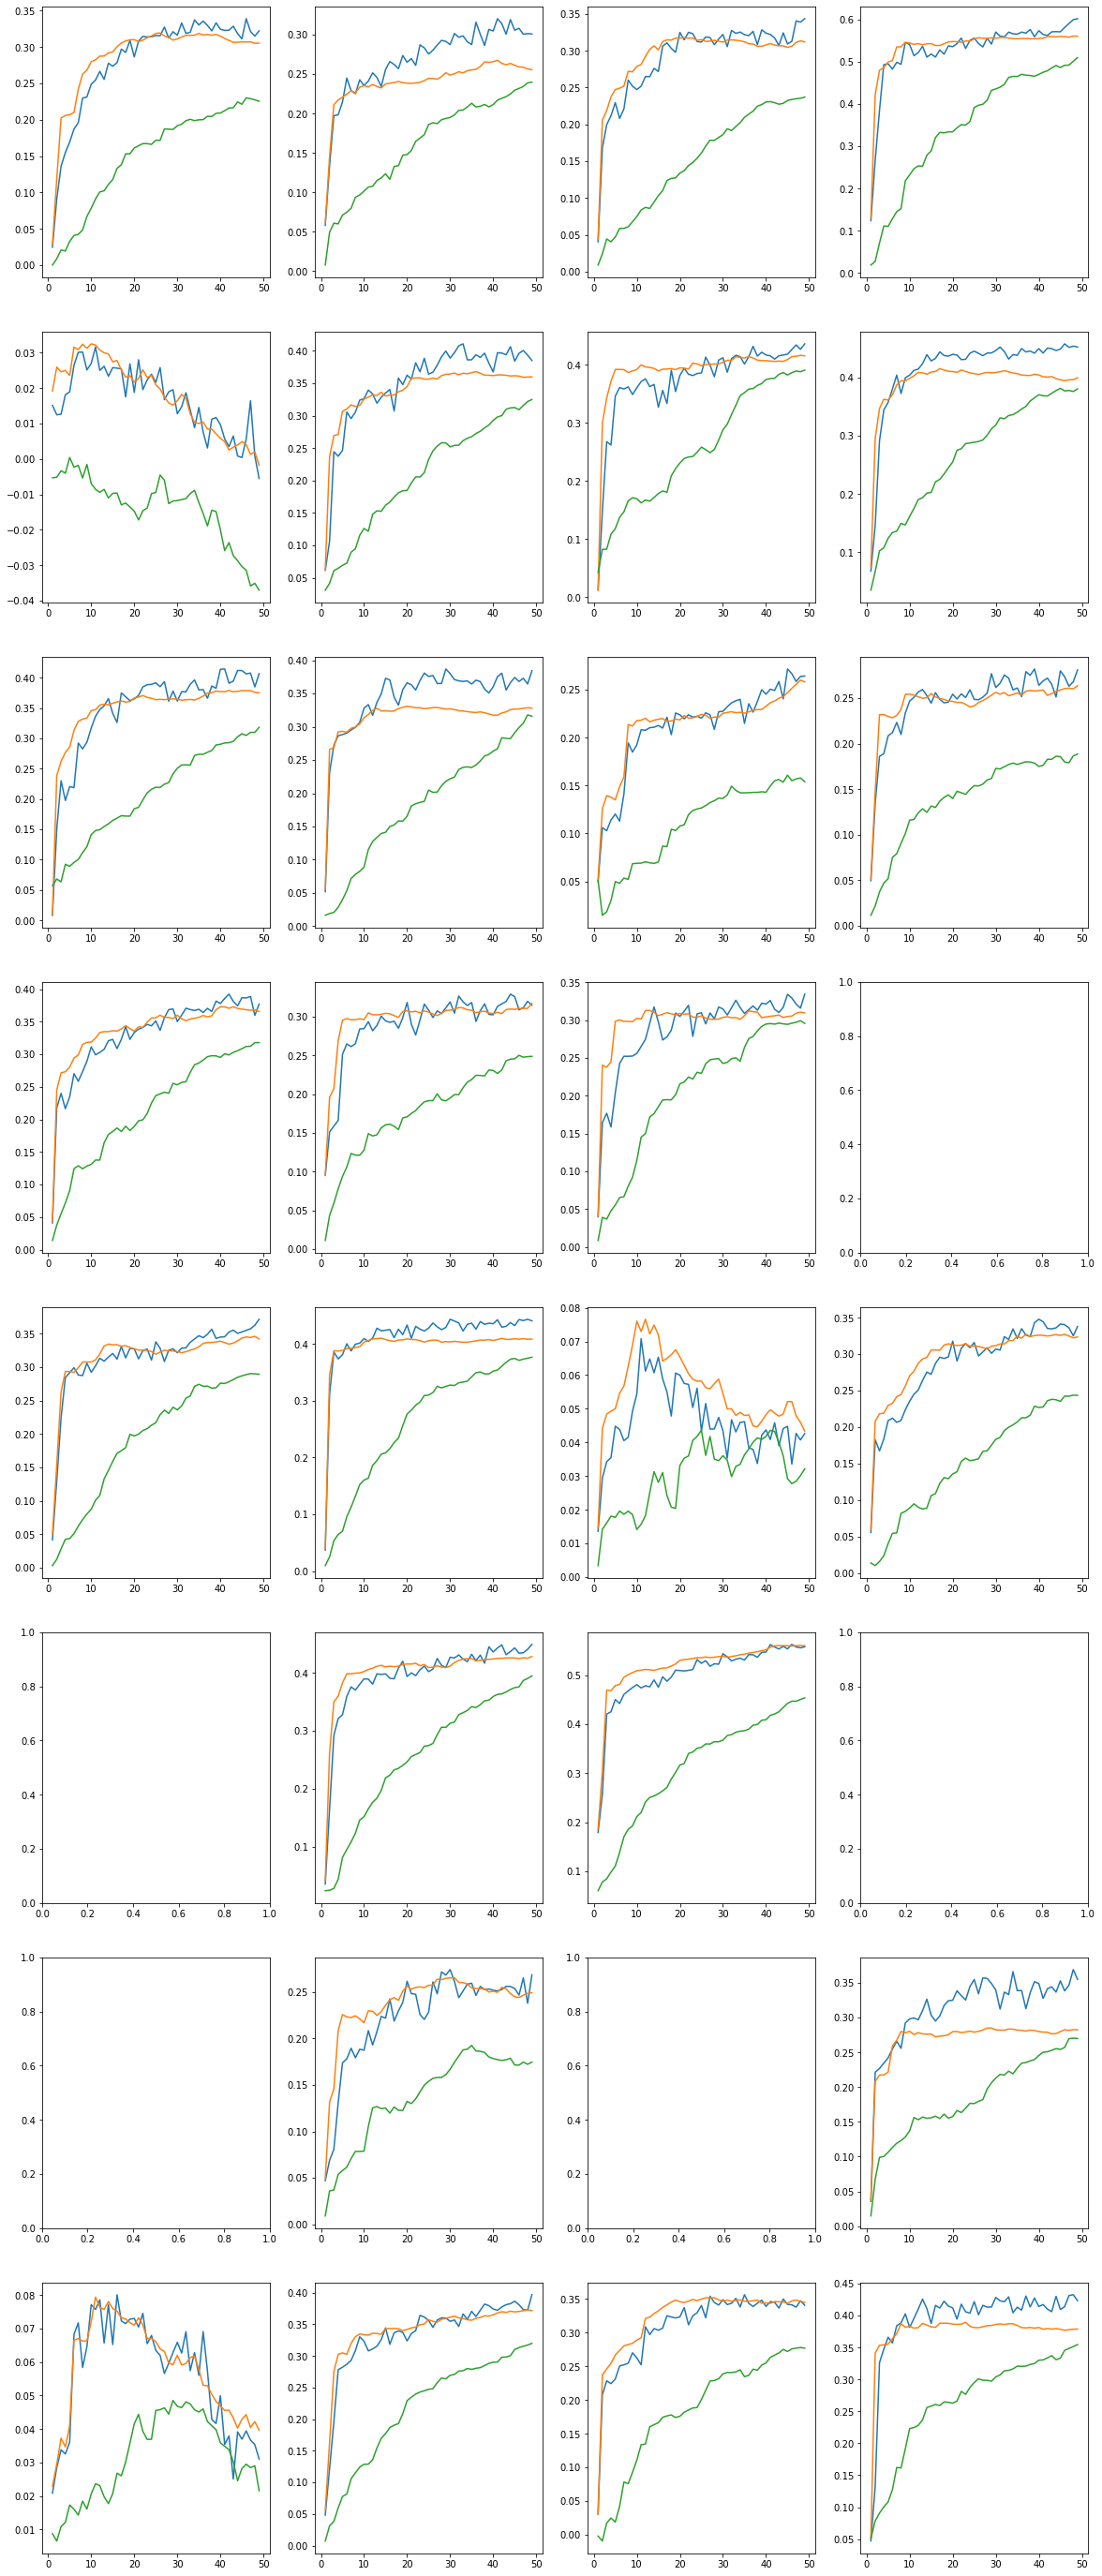

In [46]:
fig, ax = plt.subplots(8, 4, figsize=(20, 50))
trainlag = 2
testlag = 2
for i, data_file in enumerate(np.unique(dec_df['data_file'].values)):
    a = ax[np.unravel_index(i, (8, 4))]

    df = apply_df_filters(dec_df, data_file=data_file, trainlag=trainlag, testlag=testlag) 
    if len(df) == 0:
        continue
    
    dca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    pca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    ols_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    
    for j, dim in enumerate(dim_vals):
        for k, fold_idx in enumerate(fold_idxs):
            df_ = apply_df_filters(df, dim=dim, fold_idx=fold_idx, trainlag=trainlag, testlag=testlag)

            dca_r2[j, k, :] = apply_df_filters(df_, dr_method='DCA').iloc[0]['r2'][:]
            pca_r2[j, k, :] = apply_df_filters(df_, dr_method='PCA').iloc[0]['r2'][:]
            ols_r2[j, k, :] = apply_df_filters(df_, dr_method='OLS').iloc[0]['r2'][:]
        
    a.plot(dim_vals, np.mean(dca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(pca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(ols_r2[..., 0], axis = 1))

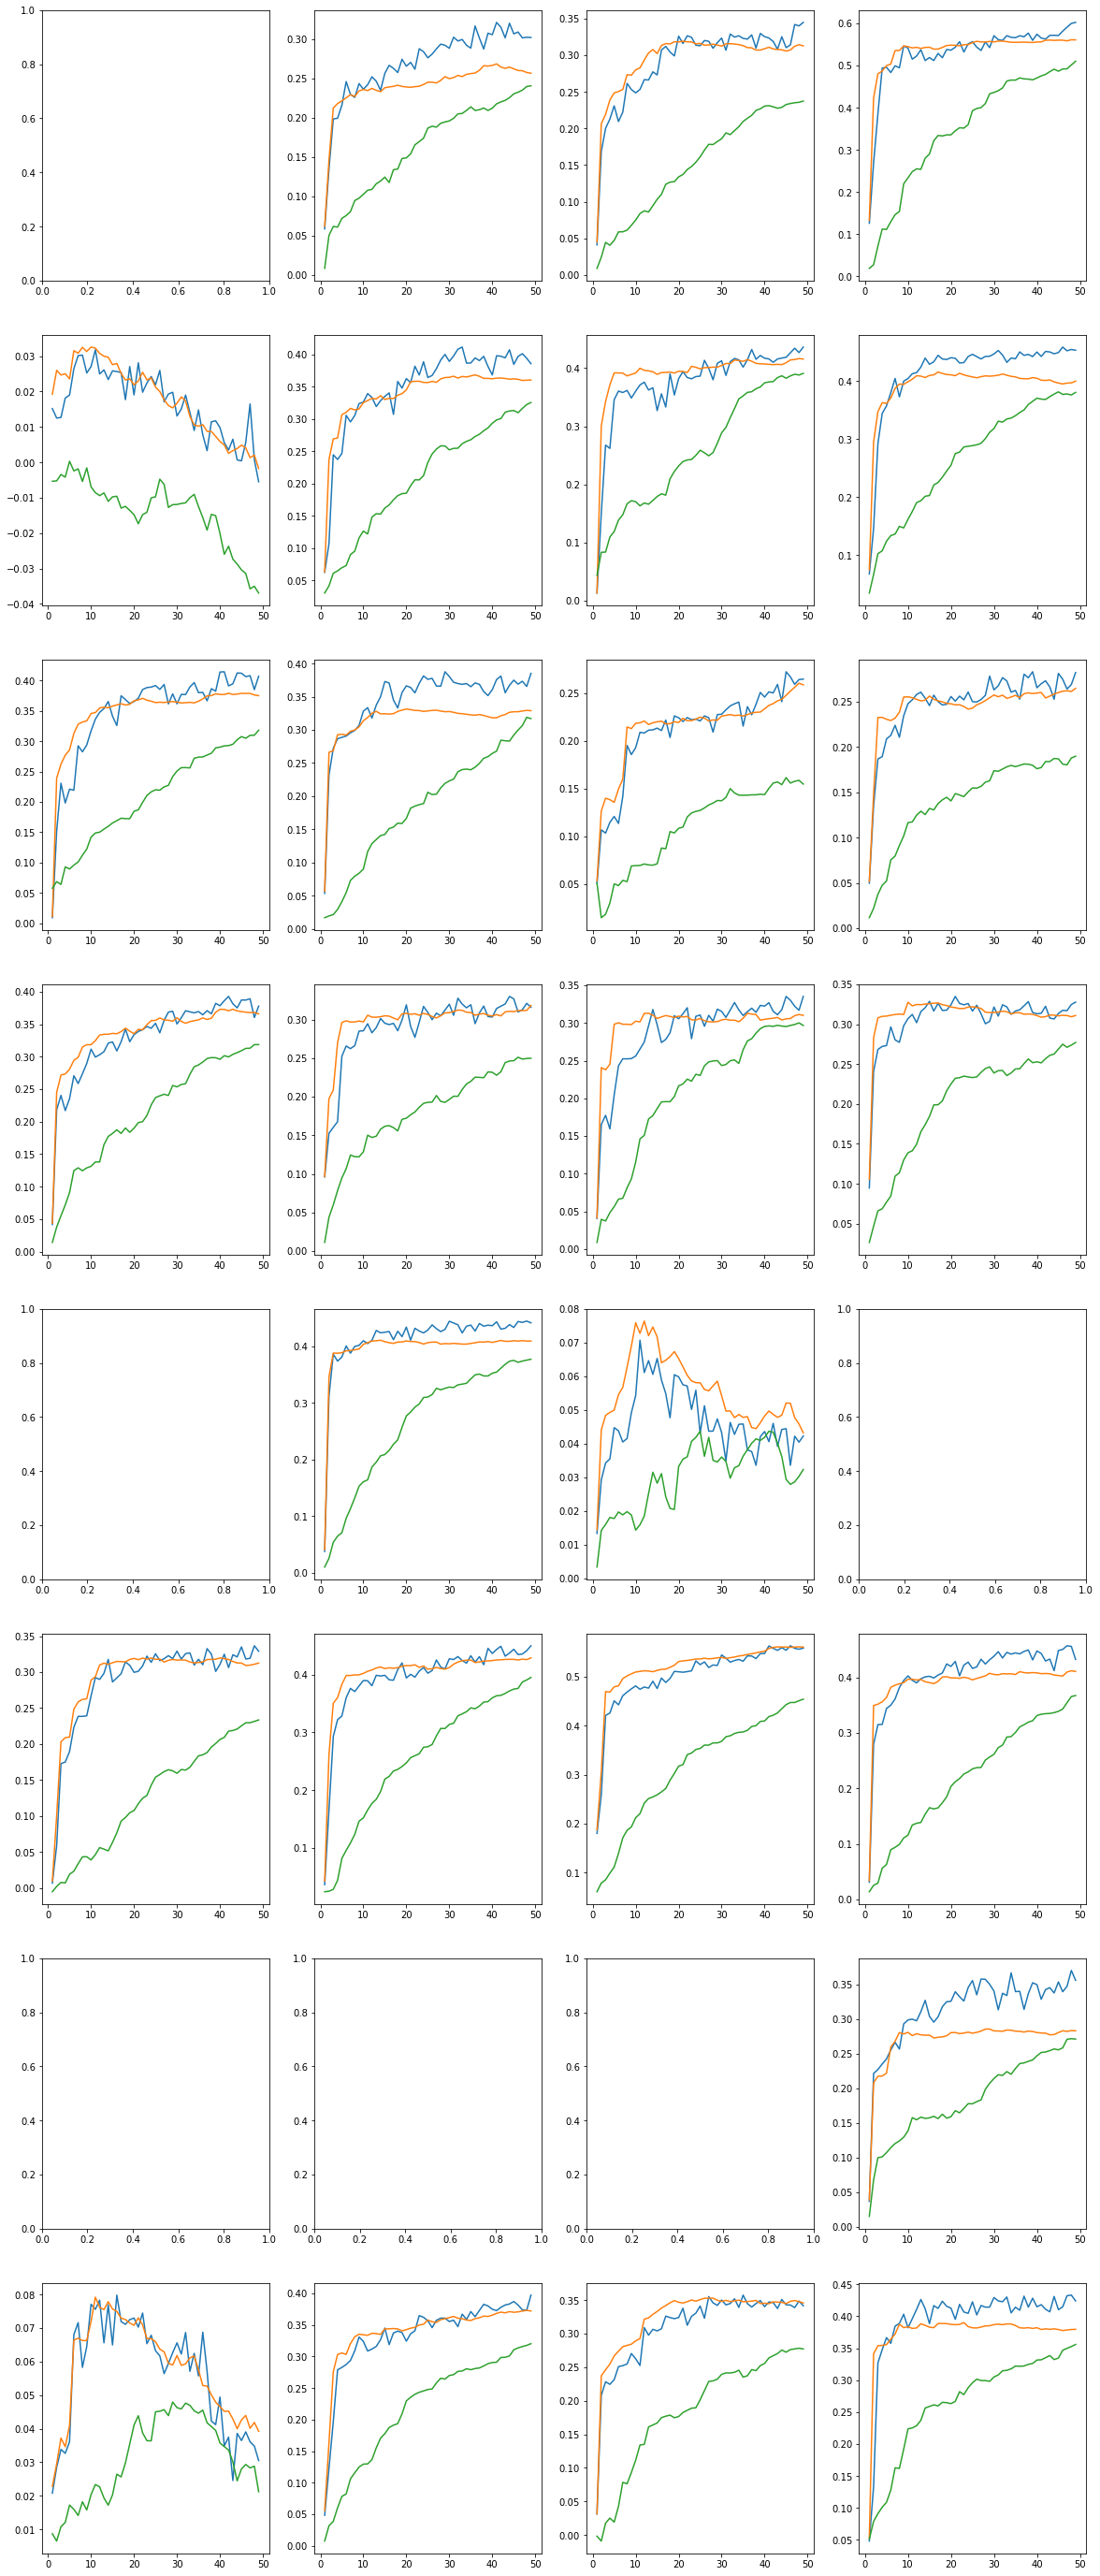

In [47]:
fig, ax = plt.subplots(8, 4, figsize=(20, 50))
trainlag = 3
testlag = 3
for i, data_file in enumerate(np.unique(dec_df['data_file'].values)):
    a = ax[np.unravel_index(i, (8, 4))]

    df = apply_df_filters(dec_df, data_file=data_file, trainlag=trainlag, testlag=testlag) 
    if len(df) == 0:
        continue
    
    dca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    pca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    ols_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    
    for j, dim in enumerate(dim_vals):
        for k, fold_idx in enumerate(fold_idxs):
            df_ = apply_df_filters(df, dim=dim, fold_idx=fold_idx, trainlag=trainlag, testlag=testlag)

            dca_r2[j, k, :] = apply_df_filters(df_, dr_method='DCA').iloc[0]['r2'][:]
            pca_r2[j, k, :] = apply_df_filters(df_, dr_method='PCA').iloc[0]['r2'][:]
            ols_r2[j, k, :] = apply_df_filters(df_, dr_method='OLS').iloc[0]['r2'][:]
        
    a.plot(dim_vals, np.mean(dca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(pca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(ols_r2[..., 0], axis = 1))

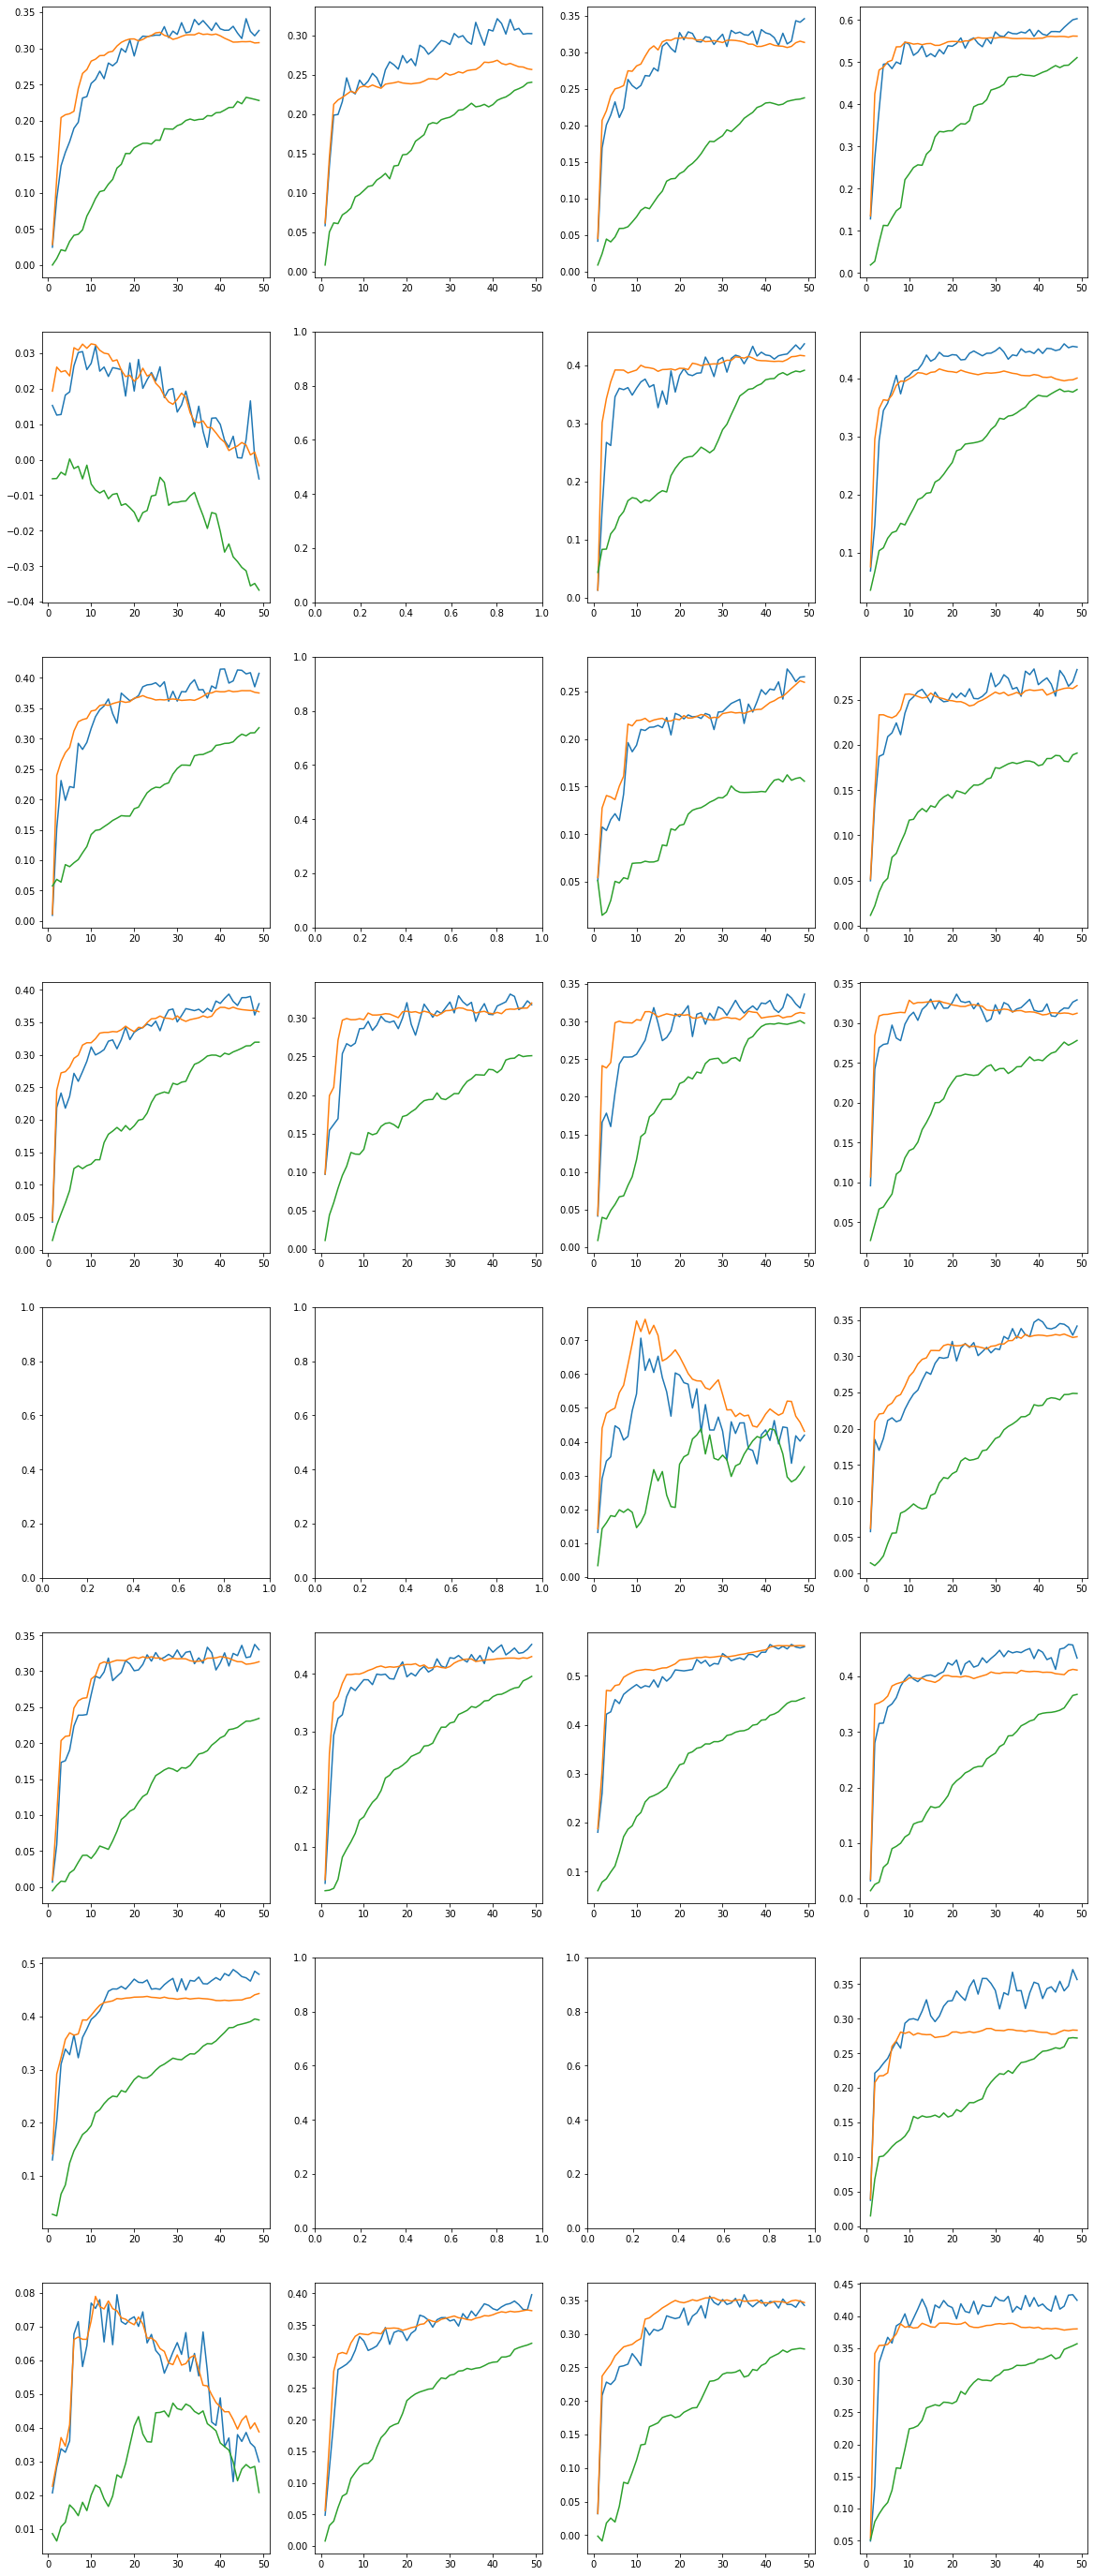

In [48]:
fig, ax = plt.subplots(8, 4, figsize=(20, 50))
trainlag = 4
testlag = 4
for i, data_file in enumerate(np.unique(dec_df['data_file'].values)):
    a = ax[np.unravel_index(i, (8, 4))]

    df = apply_df_filters(dec_df, data_file=data_file, trainlag=trainlag, testlag=testlag) 
    if len(df) == 0:
        continue
    
    dca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    pca_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    ols_r2 = np.zeros((dim_vals.size, fold_idxs.size, 3))
    
    for j, dim in enumerate(dim_vals):
        for k, fold_idx in enumerate(fold_idxs):
            df_ = apply_df_filters(df, dim=dim, fold_idx=fold_idx, trainlag=trainlag, testlag=testlag)

            dca_r2[j, k, :] = apply_df_filters(df_, dr_method='DCA').iloc[0]['r2'][:]
            pca_r2[j, k, :] = apply_df_filters(df_, dr_method='PCA').iloc[0]['r2'][:]
            ols_r2[j, k, :] = apply_df_filters(df_, dr_method='OLS').iloc[0]['r2'][:]
        
    a.plot(dim_vals, np.mean(dca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(pca_r2[..., 0], axis = 1))
    a.plot(dim_vals, np.mean(ols_r2[..., 0], axis = 1))

In [ ]:
# Focus on a single data file, vary parameters (bin width, spike threshold, and **where in the time series**)
# we fit. Compare fit R^2 of OLS fits and total behavioral predictability

# Incorporate time warping as well

In [36]:
from decoders import standardize

In [18]:
import itertools, time

In [17]:
from pyuoi.linear_model.var import VAR

In [24]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

### Exploratory stuff

In [34]:
sigma = [10, 20, 30]
bin_width = [1, 4]
spike_threshold = [None, 1]
# dlag = [0, 2, 4]
# dws = [1, 3, 5]
twin = [(-100, 800), (-200, 700), (-450, 450), (0, 900)]

varorder = [1, 3]
self_regress = [True, False]


# VAR OLS
loader_pcombs = list(itertools.product(sigma, bin_width, spike_threshold, twin)) 
var_pcombs = list(itertools.product(varorder, self_regress))
r2 = np.zeros((len(loader_pcombs), len(var_pcombs)))

In [54]:
for i, lpc in enumerate(loader_pcombs):
    sigma_, bw, st, twin_ = lpc
    dat = load_shenoy('/media/akumar/Secondary/data/shenoy_split/trialtype13.dat', 
                      bin_width=bw, boxcox=None, 
                      filter_fn='gaussian', filter_kwargs={'sigma':sigma_},
                      spike_threshold=st, tw=twin_)
    X = dat['spike_rates']    
    
    train_idxs = np.arange(int(X.shape[0] * 0.8))
    test_idxs = list(np.setdiff1d(np.arange(X.shape[0]), train_idxs).astype(int))
    train_idxs = train_idxs.astype(int)

    Xtrain = X[train_idxs, ...]
    Xtest = X[test_idxs, ...]
    
    # Standardize
    Xtrain = standardize(Xtrain)
    Xtest = standardize(Xtest)
    
    for j, vpc in enumerate(var_pcombs):
        order, sr = vpc
        t0 = time.time()
 
        # Evaluate R^2 on held out trials        
        varmodel = VAR(estimator='ols', order=order, self_regress=sr)   
        varmodel.fit(Xtrain)
        r2[i, j] = varmodel.score(Xtest)
        print((i, j))
        print(time.time() - t0)

(0, 0)
14.823848009109497
(0, 1)
21.546869039535522
(0, 2)
62.798280239105225
(0, 3)
71.24566721916199
(1, 0)
14.735487937927246
(1, 1)
19.53593635559082
(1, 2)
62.73454928398132
(1, 3)
69.93151473999023
(2, 0)
14.174204587936401
(2, 1)
18.959014177322388
(2, 2)
62.297603368759155
(2, 3)
69.4642903804779
(3, 0)
14.694194078445435
(3, 1)
19.49099063873291
(3, 2)
62.963314056396484
(3, 3)
70.17126965522766
(4, 0)
14.680143594741821
(4, 1)
19.483355283737183
(4, 2)
63.12350153923035
(4, 3)
70.18166875839233
(5, 0)
14.67134714126587
(5, 1)
19.425865173339844
(5, 2)
62.917866706848145
(5, 3)
69.87072515487671
(6, 0)
14.16219711303711
(6, 1)
19.062957525253296
(6, 2)
62.27851319313049
(6, 3)
69.47485637664795
(7, 0)
14.642861127853394
(7, 1)
19.768147230148315
(7, 2)
62.87113618850708
(7, 3)
70.2547197341919
(8, 0)
14.714893102645874
(8, 1)
19.479492664337158
(8, 2)
63.29817271232605
(8, 3)
70.29423117637634
(9, 0)
14.773091316223145
(9, 1)
19.577762365341187
(9, 2)
63.109957456588745
(9, 3)

ValueError: could not broadcast input array from shape (179,2) into shape (899,2)

In [ ]:
# Used test_shenoy.py to do this in a distributed fashion

In [71]:
rdl = []
results_files = glob.glob('/home/akumar/nse/localization/test_shenoy/*.dat')
for file in results_files:
    with open(file, 'rb') as f:
        results = pickle.load(f)
    rdl.append(results)

In [73]:
df = pd.DataFrame(rdl)

In [114]:
rdl[93]

{'sigma': 20,
 'bin_width': 4,
 'spike_threshold': 1,
 'time_win': (-100, 800),
 'order': 3,
 'self_regress': False,
 'r2': 0.14108896344954205,
 'coef': array([[[   0.        ,  -26.68811574,   20.08675279, ...,
            46.88628792,  -43.9585405 ,    5.11728579],
         [ -26.43689409,    0.        ,   12.83468   , ...,
            15.8935614 ,  -11.42004765,   17.80907291],
         [ -12.05704711,   13.79793222,    0.        , ...,
            -3.67579248,   24.15417287,   21.17732726],
         ...,
         [  72.24788752,   14.96760647,    0.21329986, ...,
             0.        ,   13.97040605,  -36.70933325],
         [ -19.12234306,  -39.3631369 ,   18.12773239, ...,
             2.52517709,    0.        ,   -0.99297225],
         [   3.4547735 ,    5.78944733,   17.87866867, ...,
           -35.68784731,  -14.34382692,    0.        ]],
 
        [[   0.        ,   53.37820504,  -40.96201032, ...,
           -92.49098094,   84.74244165,   -7.22543411],
         [  51.874

In [129]:
r2 = np.array([rdl[idx]['r2'] for idx in range(len(rdl))])

In [145]:
rdl[3]

{'sigma': 20,
 'bin_width': 1,
 'spike_threshold': None,
 'time_win': (-100, 800),
 'order': 1,
 'self_regress': False,
 'r2': -1.061195156572862e+17,
 'coef': array([[[ 0.        , -0.01981878, -0.03757141, ..., -0.02429853,
           0.00345476, -0.00789796],
         [-0.03259943,  0.        ,  0.15540205, ..., -0.00960782,
           0.00555453,  0.04138618],
         [-0.03858636,  0.12909791,  0.        , ...,  0.0190798 ,
          -0.02046258,  0.02296022],
         ...,
         [-0.02977922, -0.00751977,  0.01926538, ...,  0.        ,
           0.04277617, -0.03755955],
         [ 0.00392801,  0.00606833, -0.02666683, ...,  0.06335058,
           0.        , -0.0283369 ],
         [-0.01432962,  0.05822551,  0.04423784, ..., -0.07141361,
          -0.03738074,  0.        ]]])}

In [131]:
np.argwhere(np.bitwise_and(r2 > 0, r2 < 0.1))

array([[  8],
       [  9],
       [ 11],
       [ 13],
       [ 14],
       [ 16],
       [ 19],
       [ 30],
       [ 34],
       [ 35],
       [ 52],
       [ 54],
       [ 55],
       [ 58],
       [ 71],
       [ 80],
       [ 83],
       [ 89],
       [101],
       [102],
       [107],
       [110],
       [115],
       [128],
       [158],
       [159],
       [175],
       [180],
       [181],
       [189]])

In [126]:
r2

[0.11875097562698143,
 -9.014163644605236e+22,
 -1.1146432802530496e+16,
 -1.061195156572862e+17,
 -6.745353610611052e+17,
 -8.734081010760316e+21,
 0.11991177328850128,
 -2287283469934.042,
 0.05762686827040925,
 0.064837554173219,
 -183813992694.6755,
 0.08185703990069738,
 -0.12704403836697117,
 0.03367828608976368,
 0.05419033215229816,
 -4.772303484816333e+21,
 0.0349956398686719,
 0.6806924526439309,
 0.18931120578195315,
 0.09861491013341844,
 -3.0028081727905606e+17,
 0.6771606731748471,
 0.9986367075568635,
 0.9999991744979932,
 -0.02841319843995001,
 0.9999999551247979,
 0.998871740838973,
 0.9999999429860053,
 0.6806930510647665,
 0.9995200621737729,
 0.06639629493166531,
 0.6797551588502357,
 0.9999992332006191,
 -3.015605115160589e+21,
 0.06945990408513893,
 0.04429903959122716,
 0.9999999517694061,
 0.6802294495443258,
 -7.919653375413717e+21,
 -39522254563298.79,
 0.6472772093933047,
 0.9999999619461133,
 0.6472752028364085,
 0.6703706064076779,
 -13664325000058.662,
 0.

In [ ]:
# Does sparse regression help with r^2? Does it let us avoid setting the spike threshold?

In [ ]:
# Example - terrible r^2 without spike threshold

In [151]:
varmodel = VAR(estimator='ncv', penalty='scad', self_regress=False)

In [155]:
X = dat['spike_rates']    

train_idxs = np.arange(int(X.shape[0] * 0.8))
test_idxs = list(np.setdiff1d(np.arange(X.shape[0]), train_idxs).astype(int))
train_idxs = train_idxs.astype(int)

Xtrain = X[train_idxs, ...]
Xtest = X[test_idxs, ...]

# Standardize
Xtrain = standardize(Xtrain)
Xtest = standardize(Xtest)

In [156]:
varmodel.fit(Xtrain)

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.


/home/akumar/nse/PyUoI/pyuoi/utils.py:63: RuntimeWarning: divide by zero encountered in log
  ll = -n_samples / 2 * (1 + np.log(np.mean(rss)))


Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.


/home/akumar/nse/PyUoI/pyuoi/utils.py:63: RuntimeWarning: divide by zero encountered in log
  ll = -n_samples / 2 * (1 + np.log(np.mean(rss)))


Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i

/home/akumar/nse/PyUoI/pyuoi/utils.py:63: RuntimeWarning: divide by zero encountered in log
  ll = -n_samples / 2 * (1 + np.log(np.mean(rss)))


Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i

In [160]:
np.count_nonzero(varmodel.coef_)

74

In [157]:
varmodel.score(Xtest)

0.27390260805140054

In [158]:
varmodel2 = VAR(estimator='ols', self_regress=False)
varmodel2.fit(Xtrain)

In [159]:
varmodel2.score(Xtest)

-1.856034222419963e+20

In [ ]:
# Model is reasonable, but *very* sparse!

In [ ]:
# Alternatively, we can relax the restriction that the neuron be active on all trials, just a significant
# fraction of them

In [ ]:
# Enforce the requirement that the neuron have spiked on at least 50 % of trials

In [ ]:
# How does this affect OLS R^2?

In [174]:
trial_threshold = np.linspace(0, 1)
for tt in trial_threshold:
    dat = load_shenoy('/media/akumar/Secondary/data/shenoy_split/trialtype13.dat', bin_width=4, boxcox=None,
                      filter_fn='gaussian', filter_kwargs={'sigma': 20}, spike_threshold=1, tw=(-100, 800),
                      trial_threshold=tt)
    print('tt:%f, n_neurons:%d' % (tt, dat['spike_rates'].shape[-1]))

    X = dat['spike_rates']    

    train_idxs = np.arange(int(X.shape[0] * 0.8))
    test_idxs = list(np.setdiff1d(np.arange(X.shape[0]), train_idxs).astype(int))
    train_idxs = train_idxs.astype(int)

    Xtrain = X[train_idxs, ...]
    Xtest = X[test_idxs, ...]

    # Standardize
    Xtrain = standardize(Xtrain)
    Xtest = standardize(Xtest) 
    
    varmodel_ = VAR(estimator='ols', self_regress=False)
    varmodel_.fit(Xtrain)
    print(varmodel_.score(Xtest))
    

tt:0.000000, n_neurons:202
-1.856034222419963e+20
tt:0.020408, n_neurons:180
-0.8009576122031704
tt:0.040816, n_neurons:175
-0.7806623961261135
tt:0.061224, n_neurons:169
-0.716565346411916
tt:0.081633, n_neurons:162
-0.70522061799938
tt:0.102041, n_neurons:158
-0.672979756868383
tt:0.122449, n_neurons:155
-0.6579786224846362
tt:0.142857, n_neurons:154
-0.6425916588534436
tt:0.163265, n_neurons:149
-0.6181804491038527
tt:0.183673, n_neurons:145
-0.6173214032278812
tt:0.204082, n_neurons:143
-0.5923205695573864
tt:0.224490, n_neurons:137
-0.5266298355567738
tt:0.244898, n_neurons:135
-0.5095263675381753
tt:0.265306, n_neurons:133
-0.5028523253252887
tt:0.285714, n_neurons:130
-0.501834059207082
tt:0.306122, n_neurons:127
-0.4477099519148062
tt:0.326531, n_neurons:122
-0.4230843326525775
tt:0.346939, n_neurons:122
-0.4230843326525775
tt:0.367347, n_neurons:120
-0.4188500049430877
tt:0.387755, n_neurons:115
-0.35972760005572524
tt:0.408163, n_neurons:111
-0.3219623332988191
tt:0.428571, n

In [175]:
trial_threshold = np.linspace(0, 1)
for tt in trial_threshold:
    dat = load_shenoy('/media/akumar/Secondary/data/shenoy_split/trialtype13.dat', bin_width=4, boxcox=None,
                      filter_fn='gaussian', filter_kwargs={'sigma': 20}, spike_threshold=1, tw=(-100, 800),
                      trial_threshold=tt)
    print('tt:%f, n_neurons:%d' % (tt, dat['spike_rates'].shape[-1]))

    X = dat['spike_rates']    

    train_idxs = np.arange(int(X.shape[0] * 0.8))
    test_idxs = list(np.setdiff1d(np.arange(X.shape[0]), train_idxs).astype(int))
    train_idxs = train_idxs.astype(int)

    Xtrain = X[train_idxs, ...]
    Xtest = X[test_idxs, ...]

    # Standardize
    Xtrain = standardize(Xtrain)
    Xtest = standardize(Xtest) 
    
    varmodel_ = VAR(estimator='ols', self_regress=True)
    varmodel_.fit(Xtrain)
    print(varmodel_.score(Xtest))
    

tt:0.000000, n_neurons:202
-315056915775566.3
tt:0.020408, n_neurons:180
0.7111880683345823
tt:0.040816, n_neurons:175
0.7249850335936491
tt:0.061224, n_neurons:169
0.7405866345440192
tt:0.081633, n_neurons:162
0.7634642282282661
tt:0.102041, n_neurons:158
0.7754951677165258
tt:0.122449, n_neurons:155
0.7814879109146631
tt:0.142857, n_neurons:154
0.7838930249927794
tt:0.163265, n_neurons:149
0.7930074595500649
tt:0.183673, n_neurons:145
0.805768878642807
tt:0.204082, n_neurons:143
0.810097836074721
tt:0.224490, n_neurons:137
0.8195777919528645
tt:0.244898, n_neurons:135
0.8256055981488339
tt:0.265306, n_neurons:133
0.8292991179152444
tt:0.285714, n_neurons:130
0.8388706107727694
tt:0.306122, n_neurons:127
0.8482672167224113
tt:0.326531, n_neurons:122
0.8633069102294741
tt:0.346939, n_neurons:122
0.8633069102294741
tt:0.367347, n_neurons:120
0.8693989005454686
tt:0.387755, n_neurons:115
0.8761716686888626
tt:0.408163, n_neurons:111
0.8860721293600277
tt:0.428571, n_neurons:109
0.8893852

In [194]:
# Demonstrate that one can throw away most neurons and preserve R^2

In [188]:
trial_threshold = np.linspace(0, 1)
for tt in trial_threshold:
    dat = load_shenoy('/media/akumar/Secondary/data/shenoy_split/trialtype13.dat', bin_width=1, boxcox=None,
                      filter_fn='gaussian', filter_kwargs={'sigma': 20}, spike_threshold=1, tw=(-450, 450),
                      trial_threshold=tt)
    print('tt:%f, n_neurons:%d' % (tt, dat['spike_rates'].shape[-1]))

    X = dat['spike_rates']    
    Z = dat['behavior']
        
    r2s = cv_decode_shenoy(X, Z, n_folds=3, trainlag=4, testlag=4, decoding_window=1)
    
    print(r2s)
    

tt:0.000000, n_neurons:202
[0.44238386987510186, 0.5275691723910633, 0.5009986295183404]
tt:0.020408, n_neurons:179
[0.46235711733309887, 0.5358247693770163, 0.5230630742253274]


KeyboardInterrupt: 

In [195]:
# Compare with DCA/PCA curves vs. dimension

In [196]:
data_files = glob.glob('/media/akumar/Secondary/data/shenoy_split/*.dat')

In [199]:
r2s = np.zeros((len(data_files), 20, 3))
trial_threshold = np.linspace(0, 1, 20)
for i, data_file in enumerate(data_files):
    t0 = time.time()
    for j, tt in enumerate(trial_threshold):
        dat = load_shenoy(data_file, bin_width=1, boxcox=None,
                          filter_fn='gaussian', filter_kwargs={'sigma': 20}, 
                          spike_threshold=1, tw=(-450, 450),
                          trial_threshold=tt)
        print('tt:%f, n_neurons:%d' % (tt, dat['spike_rates'].shape[-1]))

        X = dat['spike_rates']    
        Z = dat['behavior']

        if X.shape[0] < 3:
            r2s[i, j, :] = np.nan
            continue
        
        r2_ = cv_decode_shenoy(X, Z, n_folds=3, trainlag=4, testlag=4, decoding_window=1)
        r2s[i, j, :] = r2_
    print('i:%d, %f' % (i, time.time() - t0))

tt:0.000000, n_neurons:202
tt:0.052632, n_neurons:127
tt:0.105263, n_neurons:127
tt:0.157895, n_neurons:127
tt:0.210526, n_neurons:127
tt:0.263158, n_neurons:127
tt:0.315789, n_neurons:127
tt:0.368421, n_neurons:127
tt:0.421053, n_neurons:127
tt:0.473684, n_neurons:127
tt:0.526316, n_neurons:61
tt:0.578947, n_neurons:61
tt:0.631579, n_neurons:61
tt:0.684211, n_neurons:61
tt:0.736842, n_neurons:61
tt:0.789474, n_neurons:61
tt:0.842105, n_neurons:61
tt:0.894737, n_neurons:61
tt:0.947368, n_neurons:61
tt:1.000000, n_neurons:61
i:0, 0.842882
tt:0.000000, n_neurons:202
tt:0.052632, n_neurons:175
tt:0.105263, n_neurons:158
tt:0.157895, n_neurons:144
tt:0.210526, n_neurons:137
tt:0.263158, n_neurons:128
tt:0.315789, n_neurons:119
tt:0.368421, n_neurons:111
tt:0.421053, n_neurons:105
tt:0.473684, n_neurons:99
tt:0.526316, n_neurons:88
tt:0.578947, n_neurons:81
tt:0.631579, n_neurons:76
tt:0.684211, n_neurons:72
tt:0.736842, n_neurons:66
tt:0.789474, n_neurons:60
tt:0.842105, n_neurons:49
tt:0.

tt:0.052632, n_neurons:171
tt:0.105263, n_neurons:161
tt:0.157895, n_neurons:156
tt:0.210526, n_neurons:147
tt:0.263158, n_neurons:137
tt:0.315789, n_neurons:125
tt:0.368421, n_neurons:117
tt:0.421053, n_neurons:109
tt:0.473684, n_neurons:101
tt:0.526316, n_neurons:97
tt:0.578947, n_neurons:93
tt:0.631579, n_neurons:74
tt:0.684211, n_neurons:69
tt:0.736842, n_neurons:64
tt:0.789474, n_neurons:63
tt:0.842105, n_neurons:49
tt:0.894737, n_neurons:44
tt:0.947368, n_neurons:33
tt:1.000000, n_neurons:16
i:15, 33.412402
tt:0.000000, n_neurons:202
tt:0.052632, n_neurons:180
tt:0.105263, n_neurons:164
tt:0.157895, n_neurons:150
tt:0.210526, n_neurons:146
tt:0.263158, n_neurons:139
tt:0.315789, n_neurons:129
tt:0.368421, n_neurons:118
tt:0.421053, n_neurons:110
tt:0.473684, n_neurons:101
tt:0.526316, n_neurons:95
tt:0.578947, n_neurons:88
tt:0.631579, n_neurons:75
tt:0.684211, n_neurons:68
tt:0.736842, n_neurons:61
tt:0.789474, n_neurons:49
tt:0.842105, n_neurons:45
tt:0.894737, n_neurons:35
tt:

tt:0.105263, n_neurons:160
tt:0.157895, n_neurons:151
tt:0.210526, n_neurons:139
tt:0.263158, n_neurons:132
tt:0.315789, n_neurons:123
tt:0.368421, n_neurons:114
tt:0.421053, n_neurons:106
tt:0.473684, n_neurons:101
tt:0.526316, n_neurons:97
tt:0.578947, n_neurons:87
tt:0.631579, n_neurons:82
tt:0.684211, n_neurons:73
tt:0.736842, n_neurons:61
tt:0.789474, n_neurons:52
tt:0.842105, n_neurons:47
tt:0.894737, n_neurons:37
tt:0.947368, n_neurons:26
tt:1.000000, n_neurons:10
i:30, 29.619577
tt:0.000000, n_neurons:202
tt:0.052632, n_neurons:180
tt:0.105263, n_neurons:163
tt:0.157895, n_neurons:151
tt:0.210526, n_neurons:141
tt:0.263158, n_neurons:129
tt:0.315789, n_neurons:123
tt:0.368421, n_neurons:112
tt:0.421053, n_neurons:109
tt:0.473684, n_neurons:97
tt:0.526316, n_neurons:93
tt:0.578947, n_neurons:86
tt:0.631579, n_neurons:80
tt:0.684211, n_neurons:72
tt:0.736842, n_neurons:66
tt:0.789474, n_neurons:54
tt:0.842105, n_neurons:45
tt:0.894737, n_neurons:36
tt:0.947368, n_neurons:30
tt:1.

In [ ]:
# Is there a downsampling time scale at which the self regression is benign?

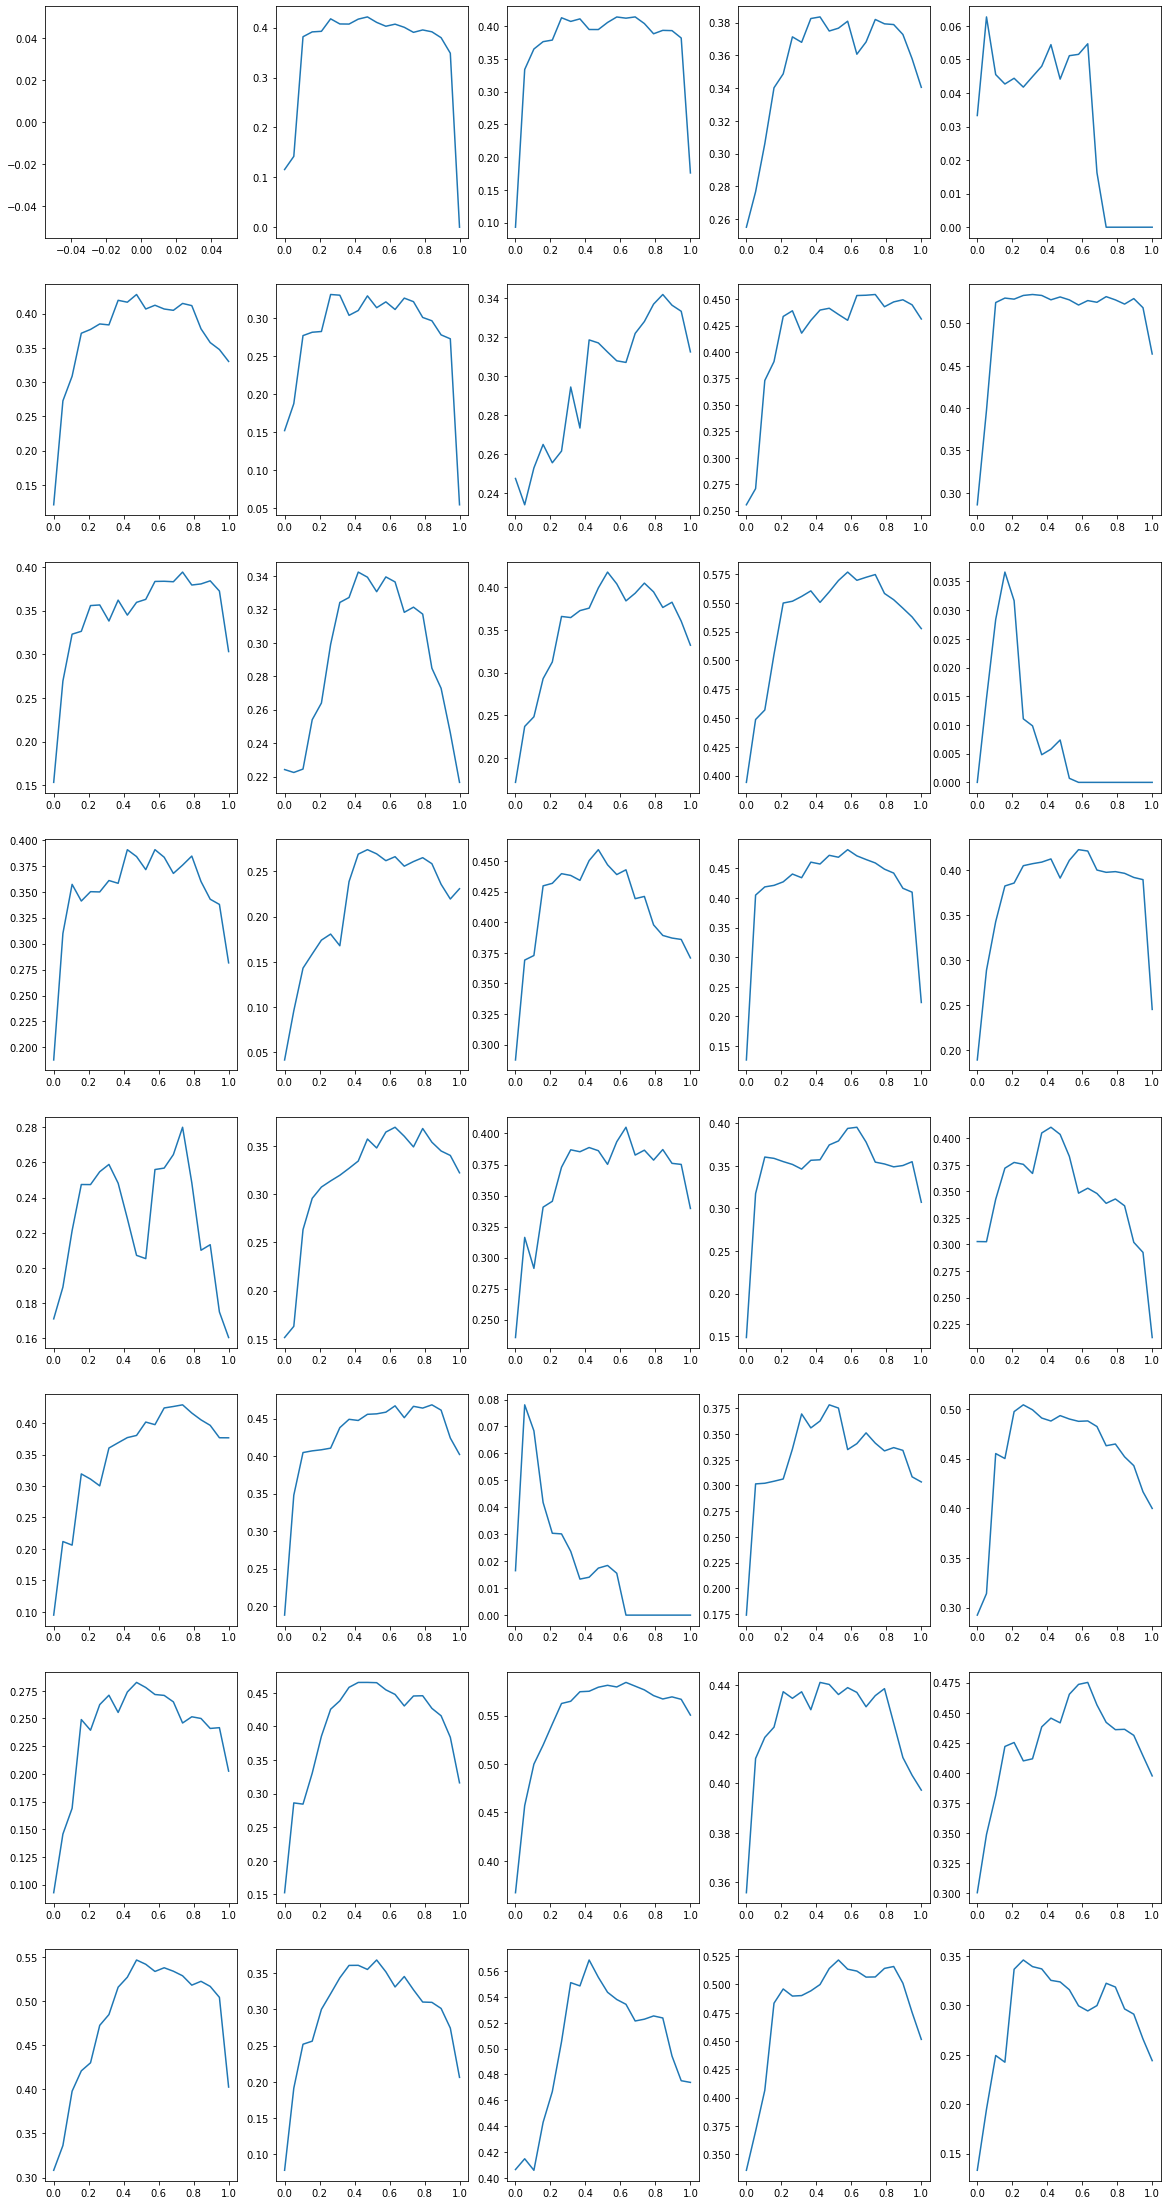

In [204]:
fig, ax = plt.subplots(8, 5, figsize=(20, 40))

for i in range(len(data_files)):
    
    a = ax[np.unravel_index(i, (8, 5))]
    a.plot(np.linspace(0, 1, 20), np.maximum(0, np.max(r2s[i, ...], axis=-1)[::-1]))

In [207]:
from tqdm import tqdm

In [ ]:
y = np.random.normal(size=(39512, 1))
y = np.random.normal(size=())

In [ ]:
%timeit 

In [219]:
# Fits via sparse VAR as a function of trial threshold
trial_threshold = np.linspace(0, 1, 10)
A = []
r2 = []
for tt in tqdm(trial_threshold):
    
    dat = load_shenoy('/media/akumar/Secondary/data/shenoy_split/trialtype13.dat', bin_width=1, boxcox=None,
                      filter_fn='gaussian', filter_kwargs={'sigma': 20}, spike_threshold=1, tw=(-450, 450),
                      trial_threshold=tt)
    print('tt:%f, n_neurons:%d' % (tt, dat['spike_rates'].shape[-1]))

    X = dat['spike_rates']    

    train_idxs = np.arange(int(X.shape[0] * 0.8))
    test_idxs = list(np.setdiff1d(np.arange(X.shape[0]), train_idxs).astype(int))
    train_idxs = train_idxs.astype(int)

    Xtrain = X[train_idxs, ...]
    Xtest = X[test_idxs, ...]

    # Standardize
    Xtrain = standardize(Xtrain)
    Xtest = standardize(Xtest) 
    
    varmodel = VAR(estimator='ncv', penalty='scad', self_regress=False)    
    varmodel.fit(Xtrain)
    
    A.append(varmodel.coef_)
    r2.append(varmodel.score(Xtest))    


  0%|          | 0/10 [00:00<?, ?it/s]

tt:0.000000, n_neurons:202
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.


/home/akumar/nse/PyUoI/pyuoi/utils.py:66: RuntimeWarning: divide by zero encountered in log
  rss = (y_true - y_pred)**2


Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i

/home/akumar/nse/PyUoI/pyuoi/utils.py:66: RuntimeWarning: divide by zero encountered in log
  rss = (y_true - y_pred)**2


Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.



 10%|█         | 1/10 [03:58<35:44, 238.24s/it]

tt:0.111111, n_neurons:156
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
T


 20%|██        | 2/10 [06:26<24:44, 185.56s/it]

tt:0.222222, n_neurons:143
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
T


 30%|███       | 3/10 [08:25<18:04, 154.88s/it]

tt:0.333333, n_neurons:126
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
T


 40%|████      | 4/10 [10:03<13:15, 132.51s/it]

tt:0.444444, n_neurons:109
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
T


 50%|█████     | 5/10 [11:26<09:33, 114.71s/it]

tt:0.555556, n_neurons:89
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Tr


 60%|██████    | 6/10 [12:11<06:03, 90.80s/it] 

tt:0.666667, n_neurons:74
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Tr


 70%|███████   | 7/10 [12:32<03:24, 68.25s/it]

Training is over.
tt:0.777778, n_neurons:65
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Tr


 80%|████████  | 8/10 [12:49<01:43, 51.96s/it]

Training is over.
tt:0.888889, n_neurons:45
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.



 90%|█████████ | 9/10 [12:58<00:38, 38.26s/it]

tt:1.000000, n_neurons:19
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.


100%|██████████| 10/10 [13:00<00:00, 78.08s/it]

Training is over.
Training is over.


In [220]:
r2

[-0.04377934416573923,
 -0.04338542507228509,
 -0.03516386304198477,
 -0.022215712825692197,
 -0.012886835478758457,
 0.014122183494330212,
 0.02808004483497668,
 0.035698147484678984,
 0.0437975040310258,
 0.06640918590577231]

### Finding good parameters for VAR

In [20]:
import itertools
from decoders import standardize, lr_decoder
from pyuoi.linear_model.var import VAR, form_lag_matrix
from neurosim.models.var import form_companion
from tqdm import tqdm
import networkx as nx
import collections

In [21]:
# Pick 4 reach directions
#dfiles = ['trialtype13.dat', 'trialtype17.dat', 'trialtype26.dat', 'trialtype31.dat']
dfile = 'trialtype13.dat'
estimator = ['ols', 'uoi']
self_regress = [True, False]
estimation_score = ['gMDL', 'AIC', 'BIC'] 
order = [1, 2, 3]

param_combs = itertools.product(estimator, self_regress, estimation_score, order)
results_dict_list = []

dat = load_shenoy('/media/akumar/Secondary/data/shenoy_split/' + dfile, 
                  1, None, filter_fn='gaussian', filter_kwargs={'sigma':20}, 
                  spike_threshold=1, trial_threshold=0.5, tw=(-450, 450))

x = np.squeeze(dat['spike_rates'])
z = np.squeeze(dat['behavior'])

# Standardize and divide into train/test splits
Xtrain = x[0:int(0.8*x.shape[0]), :]
Xtest = x[int(0.8*x.shape[0]):, :]

Ztrain = z[0:int(0.8*x.shape[0]), :]
Ztest = z[int(0.8*x.shape[0]):, :]

Xtrain = standardize(Xtrain)
Xtest = standardize(Xtest)

Ztrain = standardize(Ztrain)
Ztest = standardize(Ztest)

for i, pc in tqdm(enumerate(param_combs)):

    results_dict = {}
    estimator_, self_regress_, est_score, order_ = pc
    
    results_dict['estimator'] = estimator_
    results_dict['self_regress'] = self_regress_
    results_dict['est_score'] = est_score
    results_dict['order'] = order_    
        
    varmodel = VAR(estimator=estimator_, self_regress=self_regress_, order=order_,
                   estimation_score=est_score, n_boots_est=1, estimation_frac=1.)
    varmodel.fit(Xtrain)

    r2 = varmodel.score(Xtest)
    results_dict['r2'] = r2
    
    A_ = form_companion(varmodel.coef_)
    eig, U = scipy.linalg.eig(A_)
    eigorder = np.argsort(np.abs(eig))[::-1]
    U = U[:, eigorder]
#    loadingsA = calc_loadings(U[0:2], order_)
    
    W = scipy.linalg.solve_discrete_lyapunov(A_, np.eye(A_.shape[0]))
    eig, U = np.linalg.eig(W)    
    eigorder = np.argsort(np.abs(eig))[::-1]
    U = U[:, eigorder]
#    loadingsW = calc_loadings(U[0:2], order_)
    
    results_dict['A'] = A_
#    results_dict['loadingsA'] = loadingsA
    results_dict['W'] = W
#    results_dict['loadingsW'] = loadingsW
    
    # Decoding
    r2_ = np.zeros((50, 3))
    for i in range(1, 51):
        
        coef_ = U[:, 0:i]
        T = varmodel.order
        xtrain, ztrain = form_lag_matrix(Xtrain, T, y=Ztrain)
        xtest, ztest = form_lag_matrix(Xtest, T, y=Ztest)

        # Convert to array and force real valued entries
        xtrain = np.array(xtrain)
        xtest = np.array(xtest)
        ztrain = np.array(ztrain)
        ztest = np.array(ztest)
        
        xtrain = (xtrain @ coef_).astype(np.float)
        xtest = (xtest @ coef_).astype(np.float)

        r2_pos, r2_vel, r2_acc, decoder_obj = \
        lr_decoder(xtest, xtrain, ztest, ztrain, trainlag=4, testlag=4, decoding_window=3)
        r2_[i - 1, :] = [r2_pos, r2_vel, r2_acc]
            
    results_dict['r2_kin'] = r2_
    
    # Degree distribution and community structure
    
    # 1st order dynamics matrix
    G1 = nx.convert_matrix.from_numpy_array(varmodel.coef_[0, ...])
    # time series grpah
    G2 = nx.convert_matrix.from_numpy_array(np.sum(varmodel.coef_, axis=0))

    results_dict['graph_stats1'] = {}
    results_dict['graph_stats2'] = {}
    
    # Degree distribution
    degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    results_dict['graph_stats1']['dd'] = (deg, cnt)
    results_dict['graph_stats1']['wdd'] = np.array(list(dict(G1.degree(weight='weight')).values()))

    degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    results_dict['graph_stats2']['dd'] = (deg, cnt)
    results_dict['graph_stats2']['wdd'] = np.array(list(dict(G2.degree(weight='weight')).values()))

    results_dict_list.append(results_dict)

18it [04:24, 16.63s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


19it [05:13, 26.54s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


20it [07:19, 56.27s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


21it [10:41, 100.08s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


22it [11:30, 84.71s/it] 

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


23it [13:31, 95.51s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


24it [16:44, 124.72s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


25it [17:29, 100.99s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


26it [19:28, 106.29s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


27it [22:43, 132.87s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


28it [26:03, 153.08s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


29it [36:43, 299.12s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


30it [53:37, 513.51s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


31it [56:56, 419.37s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


32it [1:07:28, 483.13s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


33it [1:23:58, 635.27s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


34it [1:27:06, 500.98s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i


35it [1:37:14, 532.95s/it]

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i

36it [1:53:21, 188.93s/it]


In [22]:
with open('self_regress_shenoy.dat', 'wb') as f:
    f.write(pickle.dumps(results_dict_list))

In [23]:
srdf = pd.DataFrame(results_dict_list)

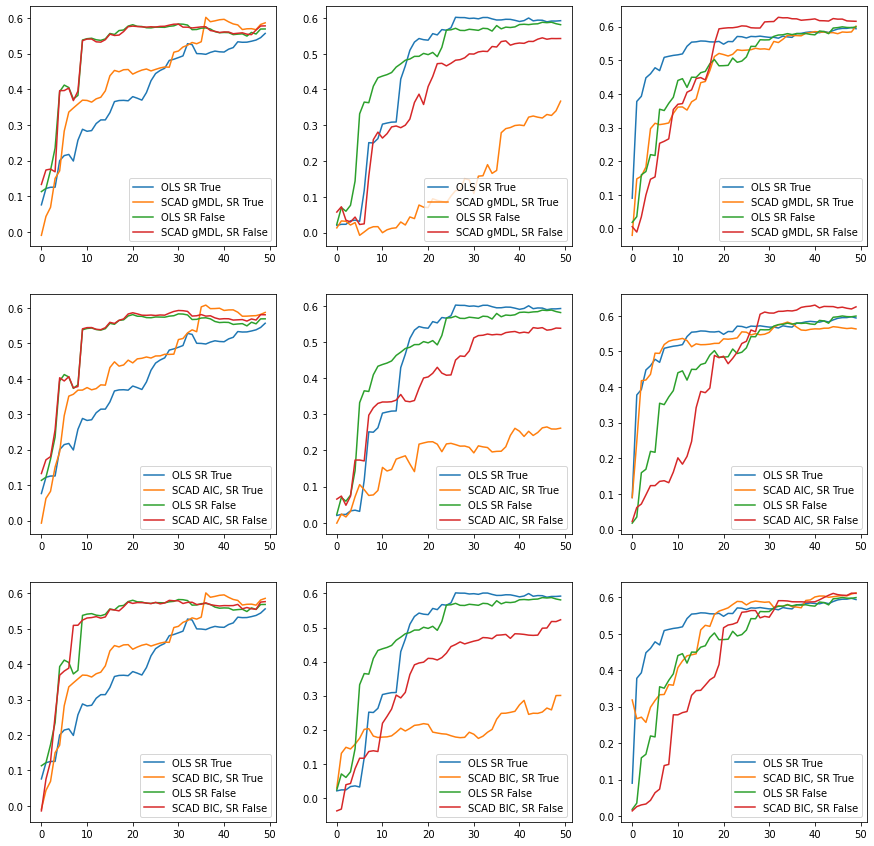

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
# Separate row for each selection method, compare to OLS on all

for i, order_ in enumerate(order):
    for j, sm in enumerate(estimation_score):
        a = ax[j, i]
        for self_regress_ in [True, False]:
            # OLS
            df_ = apply_df_filters(srdf, order=order_, estimator='ols',
                                   est_score=sm, self_regress=self_regress_)

            a.plot(df_.iloc[k]['r2_kin'][:, 0], label='OLS SR %s' % self_regress_)

            # SCAD
            df_ = apply_df_filters(srdf, order=order_, estimator='uoi',
                                   est_score=sm, self_regress=self_regress_)

            a.plot(df_.iloc[k]['r2_kin'][:, 0], label='SCAD %s, SR %s' % (sm, self_regress_))
        
        # Legend
        a.legend()

In [28]:
# Can we get better decoding accuracy on shenoy by expanding the state space?